# Image란?

## Image는 width X height X channel 의 pixels로 이루어진 matrix

- width: 너비로 이미지의 가로 길이를 의미한다.
- height: 높이로 이미지의 세로 길이를 의미한다.

- pixel: image가 가지고 있는 값으로 width X height 개수만큼 존재한다. image를 표현하는 bit방식에 따라 값의 범위가 달라진다.

다음과 같은 2x2x1 Image가 있을 때

$$f(i, j)=\begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}$$

- $f$: image
- $i$: height
- $j$: width

예를 들어 2번째 픽셀값은 $f(0,1) = 2$와 같이 표현할 수 있다.

## 일반적인 Image는 unsigned integer 8bit로 표현

bit란 2진수로 표현할 수 있는 자릿수의 가장 기본 단위

$$\log_{2} {2^{bit}}=bit$$

예를 들어, 8bit이면 $2^8=256$이므로,
- signed integer이면, 8번째 bit는 부호를 구분하는 bit이고, 나머지 7bit는 값을 표현한다. [-128, 127]까지 표현 가능하다.
- unsigned integer이면, 8bit 전부를 값을 표현하는데 사용한다. [0, 255]까지 표현 가능하다.

bit수가 높아질수록 표현할 수 있는 색의 범위가 증가한다.

![8bit와 10bit 비교 이미지](./NotebookImage/10bit.png)

위 image는 8bit일 경우와 10bit일 경우를 비교한 것이다. bit수가 높을수록 **gradation**이 자연스러워진다.

## Color Iamge는 Gray-scale Image 3장

In [ ]:
#!pip3 install opencv-python # pip
#!pip install opencv-python # conda pip
#!conda install opencv-python #conda

In [ ]:
%matplotlib inline
import cv2 # OpenCV python용 라이브러리
import os, errno # 각 OS에 맞게 경로와 디렉토리 설정을 위한 라이브러리
import numpy as np # 빠른 행렬 연산을 위한 라이브러리
import pandas as pd # data를 쉽게 다루기 위한 라이브러리
import matplotlib.pyplot as plt # 그래프 및 이미지를 출력하기 위한 라이브러리
from tqdm import tqdm_notebook, tqdm # 반복문의 진행정도를 알려주는 라이브러리
from jupyterthemes import jtplot # jupyter theme에 맞게 plot을 해주는 라이브러리
jtplot.style(theme='grade3', grid=False) # 설정한 테마에 맞게 plot 스타일 변경, grid 설정 끔
pd.set_option('display.max_colwidth', 1200) # pandas의 DataFrame에서 최대 column 너비를 1200px로 설정
plt.rc('ytick', labelsize=20) # matplotlib의 y축 label size를 20으로 고정
plt.rc('xtick', labelsize=20) # matplotlib의 x축 label size를 20으로 고정

In [ ]:
lenna_c = cv2.imread("./Sample_Image/Lenna.png")
plt.figure(figsize = (10, 10))
plt.imshow(lenna_c[:,:,::-1]) # -1 RGB에서 red와 blue의 순서를 바꿔 준다.
#plt.imshow(lenna_c[:,:,::])

위 Image는 Image Processing에서 example로 많이 쓰이는 Lenna 사진이다.

In [ ]:
print(lenna_c.shape)
pd.DataFrame(lenna_c[:,:,2])

Lenna 사진은 512 X 512 크기의 color 사진이기 때문에 Lenna 사진의 shape이 512 X 512 X 3으로 나타난다.

3개의 채널 중 하나를 선택해서 각 pixel들을 출력하면 위의 dataframe과 같다.

일반적으로 color는 빛의 3원색인 Red, Green, Blue (RGB)의 조합으로 표현된다. Lenna 사진의 channel 3개는 RGB 방식의 channel이다.
- 주의1) OpenCV의 경우, B, G, R의 순서로 읽는다.
- 주의2) OpenCV가 아닌 Matplotlib 등 다른 방식으로 image를 출력하는 경우, R, G, B 순서로 출력한다.

### Lenna 사진을 각 channel별로 분리해서 출력

In [ ]:
plt.figure(figsize = (20, 20))
plt.subplot(2, 2, 1)
plt.title("original", fontsize = 20)
plt.imshow(lenna_c[:,:,::-1])
plt.xticks([])
plt.yticks([])
plt.subplot(2, 2, 2)
plt.title("blue", fontsize = 20)
plt.imshow(lenna_c[:,:,0], cmap = "gray")
plt.xticks([])
plt.yticks([])
plt.subplot(2, 2, 3)
plt.title("green", fontsize = 20)
plt.imshow(lenna_c[:,:,1], cmap = "gray")
plt.xticks([])
plt.yticks([])
plt.subplot(2, 2, 4)
plt.title("red", fontsize = 20)
plt.imshow(lenna_c[:,:,2], cmap = "gray")
plt.xticks([])
plt.yticks([])

- Lenna 사진은 전체적으로 붉은빛을 띄기 때문에 Red Channel image가 밝게 나타난다.
- 푸른색 깃털은 Blue Channel에서 밝게 나타난다. Lense flare 효과도 관찰할 수 있다.

## 대표 색공간

### RGB

![RGB 색공간](./NotebookImage/600px-RGBCube_b.svg.png)

- 빨강, 초록, 파랑의 혼합으로 색과 명도를 표현
- 색을 혼합할수록 명도가 증가 (가산혼합)
- RGBA라고 하여 투명도 A(Alpha)를 추가하여 표현, Alpha가 Max인 pixel은 출력되지 않는다.

### CMYK

![CMYK 색공간](./NotebookImage/630px-Synthese-.svg.png)

- **C**yan (청록), **M**agenta (자홍), **Y**ellow (노랑), Blac**k** (검정)
- 색을 혼합할수록 명도가 감소 (감산혼합)
- 보통 인쇄과정에서 많이 사용

### HSV

![HSV 색공간](./NotebookImage/HSV_cone.jpg)

- Hue (색상), Saturation (채도), Value (명도)
- 가산 또는 감산 혼합보다 직관적으로 색상 지정 가능
- 시각 예술에서 많이 사용

## 대표 Image 파일 확장자

### JPEG

![JPEG 예시](./NotebookImage/Felis_silvestris_silvestris_small_gradual_decrease_of_quality.png)

- 손실압축 방식을 사용하는 이미지 형식
- 파일 크기가 작아 이미지를 보관 및 전송하는데 많이 사용
- 압축률이 높을수록 위 고양이 사진의 왼쪽처럼 손상이 많이 발생
- YCbCr이라는 색공간을 사용
    - Y: 휘도 (밝기 정보)
    - CbCr: 색차 (색깔정보)

### PNG

![png jpeg 비교](./NotebookImage/Comparison_of_JPEG_and_PNG.png)

- 무손실 압축 방식을 사용하는 이미지 형식
- JPEG보다 넓은 색깔을 지원
- RGB 색공간을 사용
- Alpha 채널도 지원

# OpenCV란?

![opencv](./NotebookImage/225px-OpenCV_Logo_with_text.png)

- Open Source Computer Vision으로 실시간 computer vision을 목적으로 개발된 library
- Intel에서 개발하다가 open source화
- Cross Platform이기 때문에 Windows, Mac, Linux, OS에 상관없이 동작 가능
- C/C++로 개발
- Python, JAVA, MATLAB 등에 binding되어 개발 환경 지원

## Applications

### Geometric Transform

![geometric transform](./NotebookImage/perspective.jpg)

### Segmentation

![segmentation](./NotebookImage/opencv_semantic_segmentation_animation.gif)

### OCR

![ocr](./NotebookImage/ocr_result_05.jpg)

이 외에도 다양한 Application들이 있으며, 실시간에 초점을 맞추고 나온 library이기 때문에 mobile camera나 로봇 등에 recognition module로 붙여 활용

## PIL도 있는데 왜 OpenCV인가?

PIL은 Python Image Library로 Image를 읽고 쓸 수 있으며, Blur, Contouring, edge finding 등 다양한 filter를 지원한다. 그 외에도 sharpen, contrast 등 image enhancement 관련 기능도 지원한다.

### 결론

- OpenCV는 numpy array로 연산하기 때문에 PIL보다 처리 속도가 빠르다.
- OpenCV는 numpy로 다루기 때문에 pixel 단위의 가공 및 변환이 PIL보다 더 쉽다.
- OpenCV는 python이 나오기 전부터 있었기 때문에 code와 application이 많이 존재해 활용하기 좋다.

- 광선검 - https://www.youtube.com/watch?v=vaeFCJnIdP0
- motion gesture - https://www.youtube.com/watch?v=Fn2ry_9Vxbc
- object tracking - https://www.youtube.com/watch?v=3BJFxnap0AI

그 외 장점은 실습을 하며 알아보자.

In [ ]:
%matplotlib inline
import cv2 # OpenCV python용 라이브러리
import os, errno # 각 OS에 맞게 경로와 디렉토리 설정을 위한 라이브러리
import numpy as np # 빠른 행렬 연산을 위한 라이브러리
import pandas as pd # data를 쉽게 다루기 위한 라이브러리
import matplotlib.pyplot as plt # 그래프 및 이미지를 출력하기 위한 라이브러리
from tqdm import tqdm_notebook, tqdm # 반복문의 진행정도를 알려주는 라이브러리
from jupyterthemes import jtplot # jupyter theme에 맞게 plot을 해주는 라이브러리
jtplot.style(theme='grade3', grid=False) # 설정한 테마에 맞게 plot 스타일 변경, grid 설정 끔
pd.set_option('display.max_colwidth', 1200) # pandas의 DataFrame에서 최대 column 너비를 1200px로 설정
plt.rc('ytick', labelsize=20)
plt.rc('xtick', labelsize=20)

# OpenCV 실습

OpenCV는 numpy를 사용하기 때문에 반드시 numpy를 같이 import 해줘야 한다.

## Image Read/Write

### Read

cv2의 imread를 이용해 image를 읽을 수 있다.

In [ ]:
lenna_c = cv2.imread("./Sample_Image/Lenna.png")

cv2.imread(image file 경로, flag)

아래와 같은 flag를 통해 읽고 싶은 형태로 image를 읽는 것이 가능
- cv2.IMREAD_COLOR: default flag, 1로 표기 가능, color image로 읽기, gray-scale도 color로 읽으니 주의
- cv2.IMREAD_GRAYSCALE: 0으로 표기 가능, gray-scale image로 읽기
- cv2.IMREAD_UNCHANGED: -1로 표기 가능, alpha channel 포함해서 읽기 가능

In [ ]:
lenna_c.shape

color image이기 때문에 width, height, channel 형태로 shape이 출력

#### image 출력

In [ ]:
plt.figure(figsize = (10,10))
plt.imshow(lenna_c)

OpenCV는 B, G, R 순서로 읽기 때문에 그냥 출력하면, red channel이 blue로 인식되어 위와 같이 파랗게 출력.

올바르게 출력시켜주는 방법으론 2가지가 존재
1. cv2.cvtColor(image, cv2.COLOR_BGR2RGB)로 변환 후 출력
2. image[:,:,::-1], numpy array에서 channel의 순서를 역순으로 하여 출력

In [ ]:
lenna_c_rgb = cv2.cvtColor(lenna_c, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (10,10))
plt.imshow(lenna_c_rgb)

In [ ]:
plt.figure(figsize = (10,10))
plt.imshow(lenna_c[:,:,::-1])

2번이 추가 작업이 없어 더 효율적이다.

#### Gray-scale

In [ ]:
lenna_g = cv2.imread("./Sample_Image/Lenna.png", 0)

image를 gray-scale로 읽고 싶을 때는 뒤에 file 경로 뒤에 0 또는 cv2.IMREAD_GRAYSCALE 입력

In [ ]:
plt.figure(figsize = (10,10))
plt.imshow(lenna_g)

그냥 출력하게 되면 matplotlib에서 자동으로 color map을 설정해 푸르게 출력. 

Gray-scale로 출력하기 원하면, imshow 안에 cmap = "gray" 파라미터를 입력.

In [ ]:
plt.figure(figsize = (10,10))
plt.imshow(lenna_g, cmap = "gray")

In [ ]:
lenna_g.shape

gray-scale image이기 때문에 width, height 형태로 shape이 출력

### Color with Alpha

In [ ]:
opencv_logo = cv2.imread("./Sample_Image/OpenCV_Logo_with_text.png", -1)
opencv_logo.shape

alpha channel이 있기 때문에 channel이 4

In [ ]:
opencv_logo[:,:,3]

alpha channel이 0이면 투명

In [ ]:
plt.figure(figsize = (10,10))
plt.imshow(opencv_logo)

In [ ]:
alpha = np.zeros_like(opencv_logo[:,:,3])
alpha = alpha + 255
opencv_logo[:,:,3] = alpha

In [ ]:
plt.figure(figsize = (10,10))
plt.imshow(opencv_logo)

### Write

cv2의 imwrite를 이용해 image를 저장할 수 있다.

In [ ]:
cv2.imwrite("Lenna_Gray.png", lenna_g)

cv2.imwrite(file 경로, numpy array)

width X height 또는 width X height X channel로 표현 가능한 numpy array면 저장 가능

## Crop

image에서 특정 영역을 잘라내기 위해 아래와 같이 수행

In [ ]:
h1 = int(lenna_c.shape[0]/4)
h2 = int(3*(lenna_c.shape[0]/4))
w1 = int(lenna_c.shape[1]/4)
w2 = int(3*(lenna_c.shape[1]/4))

width와 height의 $[\frac{1}{4}, \frac{3}{4}]$ 지점을 위와 같이 설정

In [ ]:
cropped_lenna_c = lenna_c[h1:h2, w1:w2]

해당 좌표 범위의 image 출력

In [ ]:
plt.figure(figsize = (10,10))
plt.imshow(cropped_lenna_c[:,:,::-1])

## Resize

크기를 조절할 때 본래는 없는 값을 메우는 작업이 필요한데, 이를 interpolation이라고 하고 OpenCV에서 많이 사용되는 interpolation의 종류는 아래와 같다.

![interpolation](./NotebookImage/Comparison_of_1D_and_2D_interpolation.svg.png)


- cv2.INTER_LINEAR: resize의 default filter로 bilinear interpolation라고도 불린다.
- cv2.INTER_NEAREST: nearest neighbor interpolation이라고도 하며, 주변 이웃 pixel값을 가져와 빈공간을 채운다.
- cv2.INTER_AREA: 주변 pixel의 관계에 따라 resample하는 방식으로, 크기를 축소할 때 많이 사용한다. 확대할 때는 nearest neighbor와 유사하다.
- cv2.INTER_CUBIC - 4x4 이웃 pixel에 대한 bicubic interpolation, bilinear보다 부드럽고 lancozs보다 계산량이 적어 많이 사용된다.
- cv2.LANCZOS4 - 8x8 이웃 pixel에 대한lancozs interpolation, 가장 부드럽게 값을 메우지만 연산이 많이 필요하다.

### Interpolation 비교

In [ ]:
#!pip3 install imageio

In [ ]:
import imageio
import itertools
import matplotlib.gridspec as gridspec
import time

In [ ]:
# standard images in imageio
ref_images = ["imageio:coffee.png", "imageio:page.png", "imageio:immunohistochemistry.png", "imageio:horse.png"] 
# Limit starting size
images_orig = [cv2.resize(imageio.imread(im), (400,400)) for im in ref_images] 
# interpolation methods to compare
methods=[("area", cv2.INTER_AREA), 
         ("nearest", cv2.INTER_NEAREST), 
         ("linear", cv2.INTER_LINEAR), 
         ("cubic", cv2.INTER_CUBIC), 
         ("lanczos4", cv2.INTER_LANCZOS4)]

In [ ]:
def display(images, titles=['']):
    if isinstance(images[0], list):
        c = len(images[0])
        r = len(images)
        images = list(itertools.chain(*images))
    else:
        c = len(images)
        r = 1
    plt.figure(figsize=(4*c, 4*r))
    gs1 = gridspec.GridSpec(r, c, wspace=0, hspace=0)
    #gs1.update(wspace=0.01, hspace=0.01) # set the spacing between axes. 
    titles = itertools.cycle(titles)
    for i in range(r*c):
        im = images[i]
        title = next(titles)
        plt.subplot(gs1[i])
        # Don't let imshow doe any interpolation
        plt.imshow(im, cmap='gray', interpolation='none')
        plt.axis('off')
        if i < c:
            plt.title(title, fontsize = 20)
    plt.tight_layout()

#### Upsampling

50x50 -> 400x400

In [ ]:
images_small = [cv2.resize(im, (50,50),interpolation=cv2.INTER_AREA) for im in images_orig]
image_set = [[cv2.resize(im, (400,400), interpolation=m[1]) for m in methods] for im in images_small]
image_set = [[ima,]+imb for ima, imb in zip(images_small, image_set)]
names = ["original 50x50",] + [m[0]+" 400x400" for m in methods]
display(image_set, names)

- nearest neighbor와 area는 계단현상이 발생
- linear는 edge가 smooth된 효과가 발생
- cubic과 lancozs는 edge가 가장 shapen

#### DownSampling

In [ ]:
image_set = [[cv2.resize(im, (50,50), interpolation=m[1]) for m in methods] for im in images_orig]
image_set = [[ima,]+imb for ima, imb in zip(images_orig, image_set)]
names = ["original 400x400",] + [m[0]+" 50x50" for m in methods]
display(image_set, names)

- area는 주변 pixel 관계에 따라 resampling하기 때문에 상대적으로 부드럽게 변환
- 나마지는 계단 현상이 많이 발생

#### Calculation Speed

In [ ]:
n=20
data = []
scale_factors = [0.05, 0.1, 0.3, 0.5, 0.9, 1.1, 1.5, 2, 4, 7, 12]
for m in methods:
    for sf in scale_factors:
        di = []
        for i in range(n):
            t0 = time.time()
            cv2.resize(images_orig[0], (0,0), fx=sf, fy=sf, interpolation=m[1])
            dt = (time.time()-t0)
            di.append(dt)
        dt = np.mean(di)
        err = 2*np.std(di)
        data.append(dict(time=dt, method=m[0], err=err, scale=sf))
data = pd.DataFrame(data)

In [ ]:
g = data.groupby("method")
plt.figure(figsize=(15,10))
for n, gi in g:
    plt.plot(gi["scale"], gi["time"], label=n)
plt.loglog()
plt.legend()
plt.xlabel("scale factor", fontsize = 20)
plt.ylabel("ave time (sec)", fontsize = 20)
plt.title("speed comparison", fontsize = 20)
plt.grid(which="both")

- nearest가 가장 적은 계산량 요구
- downsampling 부분에서는 area가 resampling과정에서 가장 높은 계산량 요구
- linear와 cubic은 가성비가 높은 방법

## Histogram

In [ ]:
lenna_c = cv2.imread("./Sample_Image/Lenna.png")
plt.figure(figsize = (20, 20))
plt.subplot(2, 2, 1)
plt.title("original", fontsize = 20)
plt.imshow(lenna_c[:,:,::-1])
plt.xticks([])
plt.yticks([])
plt.subplot(2, 2, 2)
plt.title("blue", fontsize = 20)
plt.imshow(lenna_c[:,:,0], cmap = "gray")
plt.xticks([])
plt.yticks([])
plt.subplot(2, 2, 3)
plt.title("green", fontsize = 20)
plt.imshow(lenna_c[:,:,1], cmap = "gray")
plt.xticks([])
plt.yticks([])
plt.subplot(2, 2, 4)
plt.title("red", fontsize = 20)
plt.imshow(lenna_c[:,:,2], cmap = "gray")
plt.xticks([])
plt.yticks([])

image에서 어떤 채널이 영향이 큰지 확인하기 위해, 위와 같이 일일히 channel별로 출력하는 것은 비효율적이다.

그래서 각 channel별로 **histogram**을 통해 수치적으로 색들의 분포를 확인

In [ ]:
color = ('b','g','r')
plt.figure(figsize = (15, 10))
for i,col in enumerate(color):
    histr = cv2.calcHist([lenna_c],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

세로축은 frequency이며, 가로축은 pixel값이다. pixel값이 클수록 밝다.

red channel에 밝은 값들이 많이 몰려있다는 것을 볼 수 있다.

### Example: Remove Red

In [ ]:
lenna_c_remove_red = lenna_c.copy()
lenna_c_remove_red[:,:,2] = 0

original image를 copy한 후, red channel의 성분을 전부 0으로 저장

In [ ]:
plt.figure(figsize = (20,10))
plt.subplot(1, 2, 1)
plt.title("original", fontsize = 20)
plt.imshow(lenna_c[:,:,::-1])
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.title("remove red", fontsize = 20)
plt.imshow(lenna_c_remove_red[:,:,::-1])
plt.xticks([])
plt.yticks([])
color = ('b','g','r')
plt.figure(figsize = (18, 20))
plt.subplot(2, 1, 1)
plt.title("original", fontsize = 20)
for i,col in enumerate(color):
    histr = cv2.calcHist([lenna_c],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.subplot(2, 1, 2)
plt.title("remove red", fontsize = 20)
for i,col in enumerate(color):
    histr = cv2.calcHist([lenna_c_remove_red],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

### Histogram Function

In [ ]:
def plot_histogram_for_color_image(image):
    color = ('b','g','r')
    plt.figure(figsize = (15, 10))
    for i,col in enumerate(color):
        histr = cv2.calcHist([image],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
    plt.show()

## Change Colorspace

cv2.cvtColor(input_image, flag)
- flag로 색공간을 결정한다.
- 다양한 색공간을 지원한다.

### BGR->GRAY

In [ ]:
lenna_cvt_g = cv2.cvtColor(lenna_c, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.title("read", fontsize = 20)
plt.imshow(lenna_g, cmap = "gray")
plt.subplot(1, 2, 2)
plt.title("convert", fontsize = 20)
plt.imshow(lenna_cvt_g, cmap = "gray")

In [ ]:
lenna_cvt_g_histogram = cv2.calcHist([lenna_cvt_g],[0],None,[256],[0,256])
plt.figure(figsize = (15, 10))
plt.plot(lenna_cvt_g_histogram)
plt.figure(figsize = (15, 10))
histr_g = cv2.calcHist([lenna_g],[0],None,[256],[0,256])
plt.plot(histr_g)
plt.xlim([0,256])
plt.xlim([0,256])
plot_histogram_for_color_image(lenna_c)

### GRAY -> BGR

In [ ]:
lenna_cvt_c = cv2.cvtColor(lenna_cvt_g, cv2.COLOR_GRAY2BGR)
plt.figure(figsize=(10,10))
plt.title("convert", fontsize = 20)
plt.imshow(lenna_cvt_c[:,:,::-1])

In [ ]:
plot_histogram_for_color_image(lenna_cvt_c)
plot_histogram_for_color_image(lenna_c)

### BGR -> HSV

In [ ]:
lenna_cvt_hsv = cv2.cvtColor(lenna_c, cv2.COLOR_BGR2HSV)
lenna_cvt_hsv.shape

#### HUE

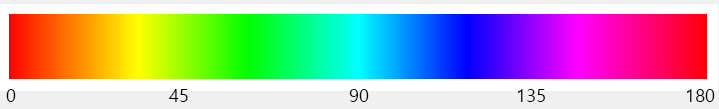

In [ ]:
from matplotlib import cm
hue = lenna_cvt_hsv[:,:,0]
plt.figure(figsize = (15, 10))
histr_hue = cv2.calcHist([hue],[0],None,[180],[0,180])
hue_range = np.arange(180)
colors = cm.hsv(hue_range / float(max(hue_range)))
plt.bar(hue_range, histr_hue[:,0], color=colors, log = True)
plt.xlim([0,180])

#### Saturation

In [ ]:
saturation = lenna_cvt_hsv[:,:,1]
plt.figure(figsize = (15, 10))
histr_sat = cv2.calcHist([saturation],[0],None,[256],[0,256])
plt.xlim([0,256])
plt.plot(histr_sat)

#### Value

In [ ]:
value = lenna_cvt_hsv[:,:,2]
plt.figure(figsize = (15, 10))
histr_val = cv2.calcHist([value],[0],None,[256],[0,256])
plt.xlim([0,256])
plt.plot(histr_val)

### HSV -> BGR

In [ ]:
lenna_cvt_hsv_c = cv2.cvtColor(lenna_cvt_hsv, cv2.COLOR_HSV2BGR)

## Brightness와 Contrast

### Brightness

image의 pixel값이 클수록 밝아지기 때문에 이미지의 밝기를 조절하기 가장 쉬운 방법은 pixel에 특정값을 더하고 빼는 것이다.

image를 밝게하기 위해서 그냥 더하면 아래와 같은 결과를 얻을 수 있다.

In [ ]:
lenna_c_bright = lenna_c + 20

In [ ]:
plt.figure(figsize = (20,10))
plt.subplot(1, 2, 1)
plt.title("original", fontsize = 20)
plt.imshow(lenna_c[:,:,::-1])
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.title("bright", fontsize = 20)
plt.imshow(lenna_c_bright[:,:,::-1])
plt.xticks([])
plt.yticks([])

자세히 보면 밝은 부위만 색이 깨진 것을 볼 수 있다.

In [ ]:
plot_histogram_for_color_image(lenna_c)
plot_histogram_for_color_image(lenna_c_bright)

histogram이 밝은 쪽으로 shift 되고 큰 값들은 순환해서 0쪽에 있는 것을 볼 수 있다.

즉, 그냥 값을 더하면 red channel의 밝은 값들이 어두운 값으로 이동하고 그에 따라 초록색과 파란색이 두드러지게 된 것이다.

이와 같은 현상이 발생한 이유는 numpy의 unsigned integer가 값이 순환되기 때문이다. 이를, 방지하기 위해 아래와 같이 작업을 수행한다.
1. unsigned integer 8bit -> 더 높은 bit
2. pixel값을 조작
3. 값의 범위를 0 ~ 255로 제한
4. unsigned integer 8bit으로 변환

In [ ]:
lenna_c_bright = np.clip((lenna_c.astype(np.int16) + 50), 0, 255).astype(np.uint8)

numpy의 clip method를 사용하면 최댓값과 쵯솟값을 제한할 수 있다.

그래서 255보다 큰 값들을 255로, 0보다 작은 값은 0으로 제한함으로서 image가 밝아지는 효과를 얻을 수 있다.

In [ ]:
plt.figure(figsize = (20,10))
plt.subplot(1, 2, 1)
plt.title("original", fontsize = 20)
plt.imshow(lenna_c[:,:,::-1])
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.title("bright", fontsize = 20)
plt.imshow(lenna_c_bright[:,:,::-1])
plt.xticks([])

In [ ]:
plot_histogram_for_color_image(lenna_c)
plot_histogram_for_color_image(lenna_c_bright)

어둡게 하기 위해선 값을 빼면 된다.

In [ ]:
lenna_c_darken = np.clip((lenna_c.astype(np.int16) - 50), 0, 255).astype(np.uint8)

In [ ]:
plt.figure(figsize = (20,10))
plt.subplot(1, 2, 1)
plt.title("original", fontsize = 20)
plt.imshow(lenna_c[:,:,::-1])
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.title("darken", fontsize = 20)
plt.imshow(lenna_c_darken[:,:,::-1])
plt.xticks([])

In [ ]:
plot_histogram_for_color_image(lenna_c)
plot_histogram_for_color_image(lenna_c_darken)

### Contrast

#### gamma을 통한 contrast 조절

$$g(i, j)=\gamma f(i, j)+\beta$$

- $g$는 결과 image
- $f$는 원본 image
- $i$: row
- $j$: height
- $\gamma$: gain, contrast를 조절하는 값
- $\beta$: bias, 밝기를 조절하는 값

$\gamma$만 Lenna image에 적용하면 아래와 같다.

In [ ]:
lenna_c_gamma1 = np.clip(2.1*(lenna_c.astype(np.int16)), 0, 255).astype(np.uint8)
lenna_c_gamma2 = np.clip(0.6*(lenna_c.astype(np.int16)), 0, 255).astype(np.uint8)

In [ ]:
plt.figure(figsize = (30,10))
plt.subplot(1, 3, 1)
plt.title("original", fontsize = 20)
plt.imshow(lenna_c[:,:,::-1])
plt.xticks([])
plt.yticks([])
plt.subplot(1, 3, 2)
plt.title("gamma1", fontsize = 20)
plt.imshow(lenna_c_gamma1[:,:,::-1])
plt.xticks([])
plt.yticks([])
plt.subplot(1, 3, 3)
plt.title("gamma2", fontsize = 20)
plt.imshow(lenna_c_gamma2[:,:,::-1])
plt.xticks([])
plt.yticks([])

In [ ]:
lenna_c_contrast1 = np.clip(2.1*(lenna_c.astype(np.int16))-50, 0, 255).astype(np.uint8)
lenna_c_contrast2 = np.clip(0.6*(lenna_c.astype(np.int16))+20, 0, 255).astype(np.uint8)

In [ ]:
plt.figure(figsize = (30,10))
plt.subplot(1, 3, 1)
plt.title("original", fontsize = 20)
plt.imshow(lenna_c[:,:,::-1])
plt.xticks([])
plt.yticks([])
plt.subplot(1, 3, 2)
plt.title("contrast1", fontsize = 20)
plt.imshow(lenna_c_contrast1[:,:,::-1])
plt.xticks([])
plt.yticks([])
plt.subplot(1, 3, 3)
plt.title("contrast2", fontsize = 20)
plt.imshow(lenna_c_contrast2[:,:,::-1])
plt.xticks([])
plt.yticks([])

$\gamma$와 $\beta$를 조작해 contrast를 조절할 수 있다.

### Histgram Equalization

Image의 histogram이 골고루 분포하도록 histgram을 늘려주는 방법이다. histogram strach 또는 Normalization이라고도 한다.

OpenCV를 통해 다음과 같이 수행한다.

In [ ]:
lenna_b_eq = cv2.equalizeHist(lenna_c[:,:,0])

In [ ]:
plt.figure(figsize = (20,10))
plt.subplot(1, 2, 1)
plt.title("original", fontsize = 20)
plt.imshow(lenna_c[:,:,0], cmap = "gray")
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.title("equalized histogram", fontsize = 20)
plt.imshow(lenna_b_eq, cmap = "gray")
plt.xticks([])
plt.yticks([])

In [ ]:
plt.figure(figsize = (16, 10))
histr_lenna_c = cv2.calcHist([lenna_c],[0],None,[256],[0,256])
plt.plot(histr)
plt.xlim([0,256])
plt.figure(figsize = (16, 10))
histr_lenna_b_eq = cv2.calcHist([lenna_b_eq],[0],None,[256],[0,256])
plt.plot(histr)
plt.xlim([0,256])

1 channel에만 사용 가능하기 때문에 color image에 적용하기 위해선 아래와 같이 수행한다.

In [ ]:
lenna_c_equalized = np.dstack((cv2.equalizeHist(lenna_c[:,:,0]), cv2.equalizeHist(lenna_c[:,:,1])))
lenna_c_equalized = np.dstack((lenna_c_equalized, cv2.equalizeHist(lenna_c[:,:,2])))
lenna_c_equalized.shape

In [ ]:
plt.figure(figsize = (20,10))
plt.subplot(1, 2, 1)
plt.title("original", fontsize = 20)
plt.imshow(lenna_c[:,:,::-1])
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.title("equalized histogram", fontsize = 20)
plt.imshow(lenna_c_equalized[:,:,::-1])
plt.xticks([])
plt.yticks([])

In [ ]:
plot_histogram_for_color_image(lenna_c)
plot_histogram_for_color_image(lenna_c_equalized)

In [ ]:
lenna_c_normalized = cv2.normalize(lenna_c, None, 0, 255, norm_type=cv2.NORM_MINMAX)

In [ ]:
plt.figure(figsize = (20,10))
plt.subplot(1, 2, 1)
plt.title("original", fontsize = 20)
plt.imshow(lenna_c[:,:,::-1])
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.title("normalization", fontsize = 20)
plt.imshow(lenna_c_normalized[:,:,::-1])
plt.xticks([])
plt.yticks([])

In [ ]:
plot_histogram_for_color_image(lenna_c)
plot_histogram_for_color_image(lenna_c_normalized)

## Saturation와 Brightness

### Saturation

In [ ]:
lenna_cvt_hsv = cv2.cvtColor(lenna_c, cv2.COLOR_BGR2HSV)
lenna_cvt_hsv_low_sat = lenna_cvt_hsv.copy()
lenna_cvt_hsv_high_sat = lenna_cvt_hsv.copy()

In [ ]:
lenna_cvt_hsv_low_sat[:,:,1] = np.clip((lenna_cvt_hsv_low_sat[:,:,1].astype(np.int16) - 50), 0, 255).astype(np.uint8)
lenna_cvt_hsv_high_sat[:,:,1] = np.clip((lenna_cvt_hsv_high_sat[:,:,1].astype(np.int16) + 50), 0, 255).astype(np.uint8)

In [ ]:
lenna_low_sat = cv2.cvtColor(lenna_cvt_hsv_low_sat, cv2.COLOR_HSV2BGR)
lenna_high_sat = cv2.cvtColor(lenna_cvt_hsv_high_sat, cv2.COLOR_HSV2BGR)

In [ ]:
plt.figure(figsize = (30,10))
plt.subplot(1, 3, 1)
plt.title("original", fontsize = 20)
plt.imshow(lenna_c[:,:,::-1])
plt.xticks([])
plt.yticks([])
plt.subplot(1, 3, 2)
plt.title("low saturation", fontsize = 20)
plt.imshow(lenna_low_sat[:,:,::-1])
plt.xticks([])
plt.yticks([])
plt.subplot(1, 3, 3)
plt.title("high saturation", fontsize = 20)
plt.imshow(lenna_high_sat[:,:,::-1])
plt.xticks([])
plt.yticks([])

#### Brightness

In [ ]:
lenna_cvt_hsv = cv2.cvtColor(lenna_c, cv2.COLOR_BGR2HSV)
lenna_cvt_hsv_low_value = lenna_cvt_hsv.copy()
lenna_cvt_hsv_high_value = lenna_cvt_hsv.copy()

In [ ]:
lenna_cvt_hsv_low_value[:,:,2] = np.clip((lenna_cvt_hsv_low_value[:,:,2].astype(np.int16) - 50), 0, 255).astype(np.uint8)
lenna_cvt_hsv_high_value[:,:,2] = np.clip((lenna_cvt_hsv_high_value[:,:,2].astype(np.int16) + 50), 0, 255).astype(np.uint8)

In [ ]:
lenna_low_value = cv2.cvtColor(lenna_cvt_hsv_low_value, cv2.COLOR_HSV2BGR)
lenna_high_value = cv2.cvtColor(lenna_cvt_hsv_high_value, cv2.COLOR_HSV2BGR)

In [ ]:
plt.figure(figsize = (30,10))
plt.subplot(1, 3, 1)
plt.title("original", fontsize = 20)
plt.imshow(lenna_c[:,:,::-1])
plt.xticks([])
plt.yticks([])
plt.subplot(1, 3, 2)
plt.title("low value", fontsize = 20)
plt.imshow(lenna_low_value[:,:,::-1])
plt.xticks([])
plt.yticks([])
plt.subplot(1, 3, 3)
plt.title("high value", fontsize = 20)
plt.imshow(lenna_high_value[:,:,::-1])
plt.xticks([])
plt.yticks([])

## Threshold

In [ ]:
img = lenna_g
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(15, 10))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i], fontsize = 20)
    plt.xticks([]),plt.yticks([])

## Rotate

In [ ]:
height, width, channels = lenna_c.shape # image의 shape를 통해서 height와 width를 추출
rotation_angle = 90 # numpy random으로 회전할 각도 선택
Rot_M = cv2.getRotationMatrix2D((width/2, height/2), rotation_angle, 1)
# openCV의 getRotationMatrix2D를 통해 회전할 각도만큼 회전하는 matrix 생성
lenna_c_rotate90 = cv2.warpAffine(lenna_c, Rot_M, (width, height))
rotation_angle = 180 # numpy random으로 회전할 각도 선택
Rot_M = cv2.getRotationMatrix2D((width/2, height/2), rotation_angle, 1)
# openCV의 getRotationMatrix2D를 통해 회전할 각도만큼 회전하는 matrix 생성
lenna_c_rotate180 = cv2.warpAffine(lenna_c, Rot_M, (width, height))
rotation_angle = 270 # numpy random으로 회전할 각도 선택
Rot_M = cv2.getRotationMatrix2D((width/2, height/2), rotation_angle, 1)
# openCV의 getRotationMatrix2D를 통해 회전할 각도만큼 회전하는 matrix 생성
lenna_c_rotate270 = cv2.warpAffine(lenna_c, Rot_M, (width, height))

1. openCV의 getRotationMatrix2D를 통해 회전하기 희망하는 각도로 회전할 수 있게 index가 설정된 matrix를 생성
2. warpAffine을 통해 1번에서 생성된 matrix와 mapping하여 회전

In [ ]:
plt.figure(figsize = (20,20))
plt.subplot(1, 4, 1)
plt.title("original", fontsize = 20)
plt.imshow(lenna_c[:,:,::-1])
plt.xticks([])
plt.yticks([])
plt.subplot(1, 4, 2)
plt.title("90", fontsize = 20)
plt.imshow(lenna_c_rotate90[:,:,::-1])
plt.xticks([])
plt.yticks([])
plt.subplot(1, 4, 3)
plt.title("180", fontsize = 20)
plt.imshow(lenna_c_rotate180[:,:,::-1])
plt.xticks([])
plt.yticks([])
plt.subplot(1, 4, 4)
plt.title("270", fontsize = 20)
plt.imshow(lenna_c_rotate270[:,:,::-1])
plt.xticks([])
plt.yticks([])

## Flip

In [ ]:
lenna_c_vertical = cv2.flip(lenna_c, 0) # 상하 뒤집기
lenna_c_horizontal = cv2.flip(lenna_c, 1) # 좌우 뒤집기
lenna_c_horizontal_vertical = cv2.flip(lenna_c_horizontal, 0) # 좌우 뒤집기

openCV의 flip method를 통해 뒤집기를 수행
- 0이면 vertical flip
- 1이면 horizontal flip

In [ ]:
plt.figure(figsize = (20,20))
plt.subplot(1, 4, 1)
plt.title("original", fontsize = 20)
plt.imshow(lenna_c[:,:,::-1])
plt.xticks([])
plt.yticks([])
plt.subplot(1, 4, 2)
plt.title("vertical", fontsize = 20)
plt.imshow(lenna_c_vertical[:,:,::-1])
plt.xticks([])
plt.yticks([])
plt.subplot(1, 4, 3)
plt.title("horizontal", fontsize = 20)
plt.imshow(lenna_c_horizontal[:,:,::-1])
plt.xticks([])
plt.yticks([])
plt.subplot(1, 4, 4)
plt.title("horizontal & vertical", fontsize = 20)
plt.imshow(lenna_c_horizontal_vertical[:,:,::-1])
plt.xticks([])
plt.yticks([])

## Blur

### basic

In [ ]:
blur3 = cv2.blur(lenna_c,(3,3))
blur5 = cv2.blur(lenna_c,(5,5))
blur7 = cv2.blur(lenna_c,(7,7))

In [ ]:
plt.figure(figsize = (20,20))
plt.subplot(1, 4, 1)
plt.title("original", fontsize = 20)
plt.imshow(lenna_c[:,:,::-1])
plt.xticks([])
plt.yticks([])
plt.subplot(1, 4, 2)
plt.title("3 x 3", fontsize = 20)
plt.imshow(blur3[:,:,::-1])
plt.xticks([])
plt.yticks([])
plt.subplot(1, 4, 3)
plt.title("5 x 5", fontsize = 20)
plt.imshow(blur5[:,:,::-1])
plt.xticks([])
plt.yticks([])
plt.subplot(1, 4, 4)
plt.title("7 x 7", fontsize = 20)
plt.imshow(blur7[:,:,::-1])
plt.xticks([])
plt.yticks([])

### Gaussian Blur

In [ ]:
Gblur3 = cv2.GaussianBlur(lenna_c,(3,3), 0)
Gblur5 = cv2.GaussianBlur(lenna_c,(5,5), 0)
Gblur7 = cv2.GaussianBlur(lenna_c,(7,7), 0)

In [ ]:
plt.figure(figsize = (20,20))
plt.subplot(1, 4, 1)
plt.title("original", fontsize = 20)
plt.imshow(lenna_c[:,:,::-1])
plt.xticks([])
plt.yticks([])
plt.subplot(1, 4, 2)
plt.title("3 x 3", fontsize = 20)
plt.imshow(Gblur3[:,:,::-1])
plt.xticks([])
plt.yticks([])
plt.subplot(1, 4, 3)
plt.title("5 x 5", fontsize = 20)
plt.imshow(Gblur5[:,:,::-1])
plt.xticks([])
plt.yticks([])
plt.subplot(1, 4, 4)
plt.title("7 x 7", fontsize = 20)
plt.imshow(Gblur7[:,:,::-1])
plt.xticks([])
plt.yticks([])

In [ ]:
Gblur72 = cv2.GaussianBlur(lenna_c,(7,7), 2)
Gblur74 = cv2.GaussianBlur(lenna_c,(7,7), 4)
Gblur78 = cv2.GaussianBlur(lenna_c,(7,7), 8)

In [ ]:
plt.figure(figsize = (20,20))
plt.subplot(2, 2, 1)
plt.title("original", fontsize = 20)
plt.imshow(lenna_c[:,:,::-1])
plt.xticks([])
plt.yticks([])
plt.subplot(2, 2, 2)
plt.title("std = 2", fontsize = 20)
plt.imshow(Gblur72[:,:,::-1])
plt.xticks([])
plt.yticks([])
plt.subplot(2, 2, 3)
plt.title("std = 4", fontsize = 20)
plt.imshow(Gblur74[:,:,::-1])
plt.xticks([])
plt.yticks([])
plt.subplot(2, 2, 4)
plt.title("std = 8", fontsize = 20)
plt.imshow(Gblur78[:,:,::-1])
plt.xticks([])
plt.yticks([])

### Median Blur

In [ ]:
Mblur3 = cv2.medianBlur(lenna_c, 3)
Mblur5 = cv2.medianBlur(lenna_c, 5)
Mblur7 = cv2.medianBlur(lenna_c, 7)

In [ ]:
plt.figure(figsize = (20,20))
plt.subplot(1, 4, 1)
plt.title("original", fontsize = 20)
plt.imshow(lenna_c[:,:,::-1])
plt.xticks([])
plt.yticks([])
plt.subplot(1, 4, 2)
plt.title("3 x 3", fontsize = 20)
plt.imshow(Mblur3[:,:,::-1])
plt.xticks([])
plt.yticks([])
plt.subplot(1, 4, 3)
plt.title("5 x 5", fontsize = 20)
plt.imshow(Mblur5[:,:,::-1])
plt.xticks([])
plt.yticks([])
plt.subplot(1, 4, 4)
plt.title("7 x 7", fontsize = 20)
plt.imshow(Mblur7[:,:,::-1])
plt.xticks([])
plt.yticks([])

## Sharpen

### Basic

In [ ]:
kernel_sharpen = np.array([[-1, -1, -1], [-1, 9, -1], [-1 ,-1, -1]])
sharpen = cv2.filter2D(lenna_c, -1, kernel_sharpen)

In [ ]:
plt.figure(figsize = (20,10))
plt.subplot(1, 2, 1)
plt.title("original", fontsize = 20)
plt.imshow(lenna_c[:,:,::-1])
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.title("sharpen", fontsize = 20)
plt.imshow(sharpen[:,:,::-1])
plt.xticks([])
plt.yticks([])

### Unsharp Mask

In [ ]:
gauss_lenna_c = cv2.GaussianBlur(lenna_c, (9,9), 10.0)
unsharp_lenna_c = cv2.addWeighted(lenna_c, 1.5, gauss_lenna_c, -0.5, 0, lenna_c)

In [ ]:
plt.figure(figsize = (20,10))
plt.subplot(1, 2, 1)
plt.title("original", fontsize = 20)
plt.imshow(lenna_c[:,:,::-1])
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.title("unsharp masking", fontsize = 20)
plt.imshow(unsharp_lenna_c[:,:,::-1])
plt.xticks([])
plt.yticks([])

## Edge Detection

### Laplacian

In [ ]:
laplacian = cv2.Laplacian(lenna_g,cv2.CV_64F)
laplacian

In [ ]:
plt.figure(figsize = (20,10))
plt.subplot(1, 2, 1)
plt.title("original", fontsize = 20)
plt.imshow(lenna_g, cmap = "gray")
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.title("laplacian", fontsize = 20)
plt.imshow(np.clip(laplacian,0,255), cmap = "gray")
plt.xticks([])
plt.yticks([])

### Sobel

In [ ]:
sobelx = cv2.Sobel(lenna_g, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(lenna_g, cv2.CV_64F, 0, 1, ksize=5)
sobel = cv2.Sobel(lenna_g, cv2.CV_64F, 1, 1, ksize=5)

In [ ]:
sobel

In [ ]:
plt.figure(figsize = (20,20))
plt.subplot(2, 2, 1)
plt.title("original", fontsize = 20)
plt.imshow(lenna_g, cmap = "gray")
plt.xticks([])
plt.yticks([])
plt.subplot(2, 2, 2)
plt.title("sobel x", fontsize = 20)
plt.imshow(np.clip(sobelx, 0, 255), cmap = "gray")
plt.xticks([])
plt.yticks([])
plt.subplot(2, 2, 3)
plt.title("sobel y", fontsize = 20)
plt.imshow(np.clip(sobely, 0, 255), cmap = "gray")
plt.xticks([])
plt.yticks([])
plt.subplot(2, 2, 4)
plt.title("sobel", fontsize = 20)
plt.imshow(np.clip(sobel, 0, 255), cmap = "gray")
plt.xticks([])
plt.yticks([])

In [ ]:
canny = cv2.Canny(lenna_g,100,200, 5)
canny

In [ ]:
plt.figure(figsize = (20,10))
plt.subplot(1, 2, 1)
plt.title("original", fontsize = 20)
plt.imshow(lenna_g, cmap = "gray")
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.title("canny", fontsize = 20)
plt.imshow(canny, cmap = "gray")
plt.xticks([])
plt.yticks([])

#### comparison

In [ ]:
plt.figure(figsize = (20,20))
plt.subplot(2, 2, 1)
plt.title("original", fontsize = 20)
plt.imshow(lenna_g, cmap = "gray")
plt.xticks([])
plt.yticks([])
plt.subplot(2, 2, 2)
plt.title("laplacian", fontsize = 20)
plt.imshow(np.clip(laplacian, 0, 255), cmap = "gray")
plt.xticks([])
plt.yticks([])
plt.subplot(2, 2, 3)
plt.title("sobel", fontsize = 20)
plt.imshow(np.clip(sobel, 0, 255), cmap = "gray")
plt.xticks([])
plt.yticks([])
plt.subplot(2, 2, 4)
plt.title("canny", fontsize = 20)
plt.imshow(canny, cmap = "gray")
plt.xticks([])
plt.yticks([])

## Line Detection

In [ ]:
line_example = cv2.imread("./Sample_Image/resize example.png")

In [ ]:
plt.figure(figsize = (10, 10))
plt.imshow(line_example, cmap = "gray")

In [ ]:
line_example_edges = cv2.Canny(line_example, 50,150, apertureSize=3)
lines = cv2.HoughLines(line_example_edges, 1, np.pi/180, 90)

In [ ]:
plt.figure(figsize = (10, 10))
plt.imshow(line_example_edges, cmap = "gray")

In [ ]:
line_example_original = line_example.copy()
for i in range(len(lines)):
    for rho, theta in lines[i]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0+1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 -1000*(a))

        cv2.line(line_example,(x1,y1),(x2,y2),(0,0,255),2)

res = np.vstack((line_example_original,line_example))

In [ ]:
plt.figure(figsize = (10, 20))
plt.imshow(res[:,:,::-1])

## Circle Detection

In [ ]:
img = cv2.imread('./Sample_Image/OpenCV_Logo_with_text.png',0)
img = cv2.medianBlur(img, 5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

In [ ]:
plt.figure(figsize = (10, 20))
plt.imshow(img, cmap = "gray")

In [ ]:
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 40,param1=50,param2=30,minRadius=0, maxRadius=0)

In [ ]:
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

In [ ]:
plt.figure(figsize = (10, 20))
plt.imshow(cimg, cmap = "gray")
plt.title("Circle Image")
plt.show()